## Lab 3

### Tatiana Romanchishina

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from pylab import *

1) Load the chr2015.csv dataset you created in the last lab into a dataframe

In [3]:
path = r'/Users/tatiana/COS575/lab1/Lab2/CHR2015.csv'
df = pd.read_csv(path)
df.head()

,STATECODE,COUNTYCODE,State,County,Premature_death_Value,Poor_or_fair_health_Value,Poor_physical_health_days_Value,Poor_mental_health_days_Value,Low_birthweight_Value,Adult_smoking_Value,...,Uninsured_adults_Value,Uninsured_children_Value,Health_care_costs_Value,Could_not_see_doctor_due_to_cost_Value,Other_primary_care_providers_Value,Median_household_income_Value,Children_eligible_for_free_lunch_Value,Homicide_rate_Value,bottom10,top10
0,1,0,AL,Alabama,9508,0.205,4.3,4.3,0.10,0.219,...,0.202,0.043,10127,0.163,48,42882,0.500,9.1,0,0
1,1,1,AL,Autauga County,8405,0.228,5.1,3.6,0.09,0.217,...,0.169,0.037,9939,0.156,18,51868,0.383,4.6,0,0
2,1,3,AL,Baldwin County,7457,0.127,3.3,3.8,0.09,0.206,...,0.199,0.054,9502,0.144,29,47539,0.344,4.3,0,0
3,1,5,AL,Barbour County,8901,0.234,4.8,4.3,0.12,0.251,...,0.228,0.045,10414,0.169,11,30981,0.697,NaN,0,0
4,1,7,AL,Bibb County,10729,0.179,4.7,5.1,0.13,0.259,...,0.193,0.042,10825,0.163,9,39781,0.546,7.8,0,0


2) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [4]:
df.shape

(3048, 70)

The rows are counties in the US and the columns are the variables that describe the counties (descriptors).

3) Make a histogram of the Premature_death_Value and Homicide_rate_Value

(0.59999999999999998, 48.0)

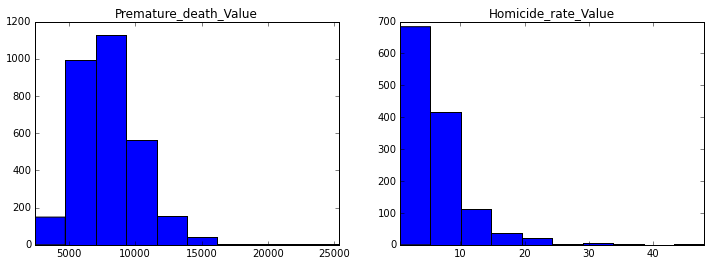

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(df['Premature_death_Value'])
axes[0].set_title("Premature_death_Value")
axes[0].set_xlim((min(df['Premature_death_Value']), max(df['Premature_death_Value'])))

axes[1].hist(df.Homicide_rate_Value[~np.isnan(df.Homicide_rate_Value)]) #exclude NaNs
axes[1].set_title('Homicide_rate_Value')
axes[1].set_xlim((min(df['Homicide_rate_Value']), max(df['Homicide_rate_Value'])));

## The distribution looks skewed to the left in both cases.

4) Make pairwise scatterplots of five of the interesting predictors (your choice, but include Premature_death_Value as one of them !) in this data set

In [6]:
from pandas.tools.plotting import scatter_matrix


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107dedeb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x108c69748>]], dtype=object)

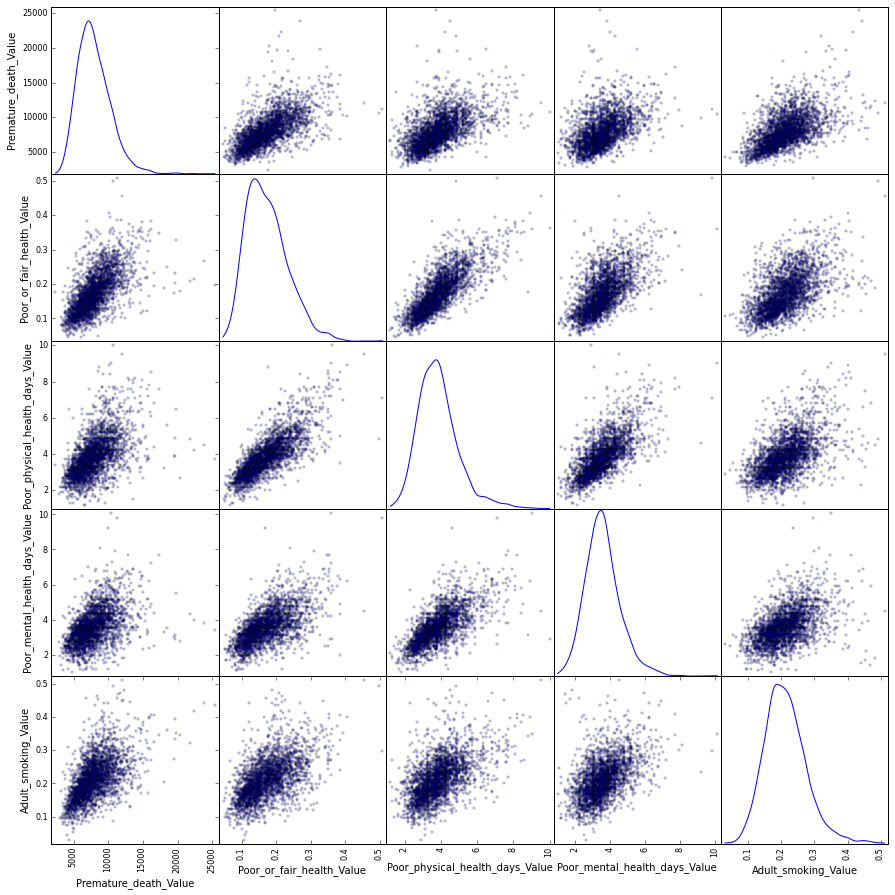

In [7]:
scatter_matrix(df[['Premature_death_Value','Poor_or_fair_health_Value',
                   'Poor_physical_health_days_Value','Poor_mental_health_days_Value',
                   'Adult_smoking_Value']], alpha=0.2, figsize=(15, 15), diagonal='kde')

5) Are any of the predictors associated with Premature_death_Value? If so, explain the relationship.

6) Which communities in Maine appear to have particularly high Premature death values? high diabetes ? low median incomes ? Comment on the range of each predictor.

In [38]:
# high premature death value
df[df['State']=="ME"].sort(columns='Premature_death_Value', ascending=False).head()[['County', 'Premature_death_Value']]

,County,Premature_death_Value
1175,Piscataquis County,8911
1166,Aroostook County,7401
1177,Somerset County,7284
1179,Washington County,7265
1165,Androscoggin County,7070


In [35]:
df.describe()['Premature_death_Value']

count     3048.000000
mean      7980.833990
std       2410.204354
min       2398.000000
25%       6309.250000
50%       7666.500000
75%       9328.750000
max      25394.000000
Name: Premature_death_Value, dtype: float64

The highest premature death values in ME are still very close to or even less than the national average.

In [37]:
# high diabetes
df[df['State']=="ME"].sort(columns='Diabetes_Value', ascending=False).head()[['County','Diabetes_Value']]

,County,Diabetes_Value
1166,Aroostook County,0.144
1175,Piscataquis County,0.123
1179,Washington County,0.113
1177,Somerset County,0.113
1174,Penobscot County,0.107


In [36]:
df.describe()['Diabetes_Value']

count    3048.000000
mean        0.109957
std         0.023306
min         0.039000
25%         0.094000
50%         0.109000
75%         0.125000
max         0.216000
Name: Diabetes_Value, dtype: float64

The highest values for the diabetes value in ME counties is only slightly higher than the national average.

In [39]:
# low median incomes
df[df['State']=="ME"].sort(columns='Median_household_income_Value').head()[['County', 'Median_household_income_Value']]

,County,Median_household_income_Value
1179,Washington County,35754
1175,Piscataquis County,36553
1166,Aroostook County,37092
1177,Somerset County,38279
1173,Oxford County,38932


In [40]:
df.describe()['Median_household_income_Value']

count      3048.000000
mean      46070.051181
std       11745.534439
min       21572.000000
25%       38097.000000
50%       44054.000000
75%       51650.000000
max      117680.000000
Name: Median_household_income_Value, dtype: float64

The lowest median income values in ME counties are below the national average. Most of them are around the 25th percentile.

7) How many communities in Maine have above the average Children_eligible_for_free_lunch_Value ? 

In [41]:
df['Children_eligible_for_free_lunch_Value'].mean()

0.43794304253785066

In [29]:
df[df['State']=="ME"].Children_eligible_for_free_lunch_Value

1164      NaN
1165      NaN
1166      NaN
1167    0.036
1168      NaN
1169    0.066
1170      NaN
1171    0.047
1172      NaN
1173      NaN
1174      NaN
1175    0.084
1176    0.069
1177      NaN
1178      NaN
1179      NaN
1180      NaN
Name: Children_eligible_for_free_lunch_Value, dtype: float64

8) What is the average Premature_death_value for those Maine communities that have above the average Children_eligible_for_free_lunch_Value vs those that do not ?  

In [ ]:
???

9) Which community in Maine has the lowest Premature death value ? What are some of the interesting values of the other predictors for that community and how do those values compare to the overall ranges for those predictors in Maine? Comment on your findings.
Put the notebook in your Stash repository.

In [42]:
# high premature death value
df[df['State']=="ME"].sort(columns='Premature_death_Value').head(1)[['County', 'Premature_death_Value']]

,County,Premature_death_Value
1176,Sagadahoc County,4780


In [43]:
df.describe()['Premature_death_Value']

count     3048.000000
mean      7980.833990
std       2410.204354
min       2398.000000
25%       6309.250000
50%       7666.500000
75%       9328.750000
max      25394.000000
Name: Premature_death_Value, dtype: float64